 # COVID-19 dataset

### Description 

 Information about Covid is collected in a standalone Covid survey and in the Follow-up Medical Survey in the Human Phenotype Project study.

### Introduction 

 This Covid survey presents the participants with questions regarding their Covid-19 vaccinations and diagnosis status. It is asked in-person, in every visit to the clinical testing center. Questions asked are related to the participant’s vaccination status, number of vaccine doses and boosters, were participants diagnosed with Covid-19 in the past and were they hospitalized following diagnosis. 

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Participants are asked the COVID survey questions during the visit to the clinical testing center (CTC) both at baseline and on follow up visits. It is asked in person, and answers are filled into the system by study coordinators.
 
### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `covid.parquet`. The 'data source' column indicates which survey the infromation comes from either the initial Covid survey or the Follow-up Medical Survey.

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/043-covid.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/43)


In [1]:
%load_ext autoreload
%autoreload 2
from pheno_utils import PhenoLoader
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pl = PhenoLoader('covid', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for covid with
19 fields
2 tables: ['covid', 'age_sex']

# Data dictionary

In [3]:
pl.dict.head()

,folder_id,feature_set,field_string,relative_location,bulk_dictionary,bulk_file_extension,description_string,field_type,array,stability,units,sampling_rate,strata,sexed,debut,completed,pandas_dtype,data_coding
tabular_field_name,,,,,,,,,,,,,,,,,,
collection_timestamp,43,covid,Collection timestamp,covid/covid.parquet,NaN,NaN,Timestamp of measurements collection,Datetime,Single,Accruing,Time,NaN,Collection time,Both sexes,4/26/2021,NaN,"datetime64[ns, Asia/Jerusalem]",NaN
collection_date,43,covid,Collection date,covid/covid.parquet,NaN,NaN,Date of measurments collection,Date,Single,Accruing,Time,NaN,Collection time,Both sexes,4/26/2021,NaN,datetime64[ns],NaN
timezone,43,covid,Timezone,covid/covid.parquet,NaN,NaN,Timezone of the measurments,Categorical (single),Single,Accruing,NaN,NaN,Collection time,Both sexes,4/26/2021,NaN,category,NaN
covid_vaccinated,43,covid,Were you vaccinated for Covid?,covid/covid.parquet,NaN,NaN,Were you vaccinated for Covid?,Categorical (single),Single,Accruing,NaN,NaN,Primary,Both sexes,4/26/2021,NaN,int,7
covid_vaccination_doses_number,43,covid,Number of vaccine doses,covid/covid.parquet,NaN,NaN,Number of vaccine doses,Integer,Single,Accruing,NaN,NaN,Primary,Both sexes,4/26/2021,NaN,int,NaN


In [4]:
pl[['covid_vaccination_doses_number', 'age', 'sex']].head()

,,,,covid_vaccination_doses_number,age,sex
participant_id,cohort,research_stage,array_index,,,
5516424321,10k,00_00_visit,0,3,54.447672,Female
5027574288,10k,00_00_visit,0,0,54.169913,Male
7783260382,10k,00_00_visit,0,4,45.892093,Male
1178277844,10k,00_00_visit,0,2,44.435100,Female
1622660825,10k,00_00_visit,0,3,44.621536,Male


In [5]:
df_codes = pl.data_codings
df_codes.head()

,code_number,coding,english,hebrew,answer_field_name,sexed,ukbb_compatible,ukbb_similar_coding,scripting_instruction,description,notes
0,001_03,0,asia/jerusalem,זמן ישראל,NaN,NaN,False,NaN,NaN,Timezone,NaN
1,062_02,1,BRCA-1,BRCA-1,brca_type_1,Both sexes,NaN,NaN,NaN,NaN,NaN
2,062_02,2,BRCA-2,BRCA-2,brca_type_2,Both sexes,NaN,NaN,NaN,NaN,NaN
3,062_02,-1,Do not know,לא יודע/ת,brca_type_3,Both sexes,NaN,NaN,NMUL,NaN,NaN
4,062_03,1,"A relative of mine got breast, ovarian, or pro...","קרוב/ת משפחה חלה/תה בסרטן השד, השחלה, או הערמו...",brca_indication_1,Both sexes,NaN,NaN,NaN,NaN,NaN


Each column represents a single question. Answers are saved as numbers.
The type of the question (integer, or category with single/multiple choice) can be found in the data dictionary.

In [6]:
pl.dict['field_type'].value_counts()

field_type
Categorical (single)    9
Integer                 3
Date                    3
Datetime                1
Text                    1
Name: count, dtype: int64

To change the representation of the answers, we can use the function tranform_answers from pheno_utils.questionnaires_handler or change the setting of preferred lanuage  for PhenoLoader (default option is english)

In [7]:
from pheno_utils.questionnaires_handler import transform_answers
col = 'covid_vaccination_manufacturer'

In [15]:
pl = PhenoLoader('covid', preferred_language='coding', base_path='s3://pheno-synthetic-data/data')
pl[col].head()

,,,,covid_vaccination_manufacturer
participant_id,cohort,research_stage,array_index,
5516424321,10k,00_00_visit,0,NaN
5027574288,10k,00_00_visit,0,Pfizer
7783260382,10k,00_00_visit,0,NaN
1178277844,10k,00_00_visit,0,NaN
1622660825,10k,00_00_visit,0,NaN


In [16]:

tranformed_english = transform_answers(col, pl[col][col], transform_from='coding', transform_to='english', 
                                     dict_df=pl.dict, mapping_df=df_codes)
tranformed_english.value_counts()

covid_vaccination_manufacturer
Pfizer    264
Name: count, dtype: int64

## Covid vaccinations

In [17]:
pl.dfs['covid'][['covid_vaccinated']].head()

,,,,covid_vaccinated
participant_id,cohort,research_stage,array_index,
5516424321,10k,00_00_visit,0,NaN
5027574288,10k,00_00_visit,0,NaN
7783260382,10k,00_00_visit,0,NaN
1178277844,10k,00_00_visit,0,NaN
1622660825,10k,00_00_visit,0,NaN


In [18]:
# Vaccinations
print('Count')
print(pl.dfs['covid']['covid_vaccinated'].value_counts().reset_index())


Count
  covid_vaccinated  count
0              Yes    276


In [19]:

print('Percentage')
print(pl.dfs['covid']['covid_vaccinated'].value_counts(normalize=True))


Percentage
covid_vaccinated
Yes    1.0
Name: proportion, dtype: float64


<Axes: title={'center': 'Covid Vaccination Doses Number'}, xlabel='covid_vaccination_doses_number', ylabel='count'>

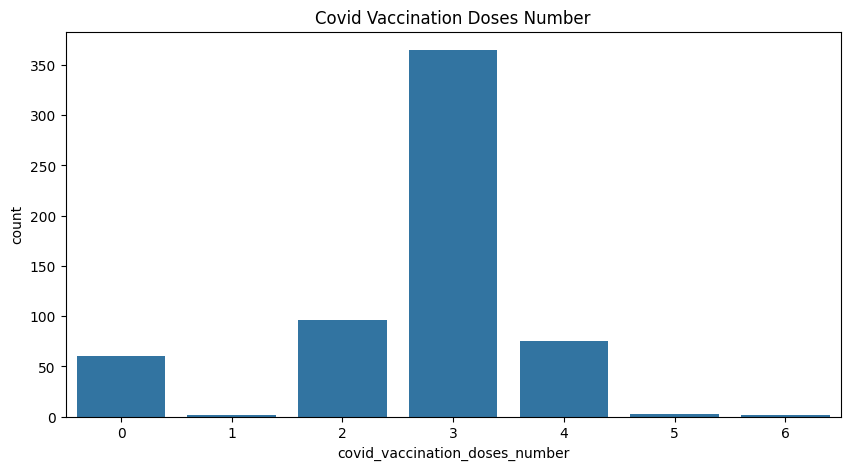

In [20]:
df = pl.dfs['covid'][['covid_vaccination_doses_number']].fillna(0)
plt.figure(figsize=(10, 5)) 
plt.title('Covid Vaccination Doses Number')
sns.countplot(data=df, x='covid_vaccination_doses_number')


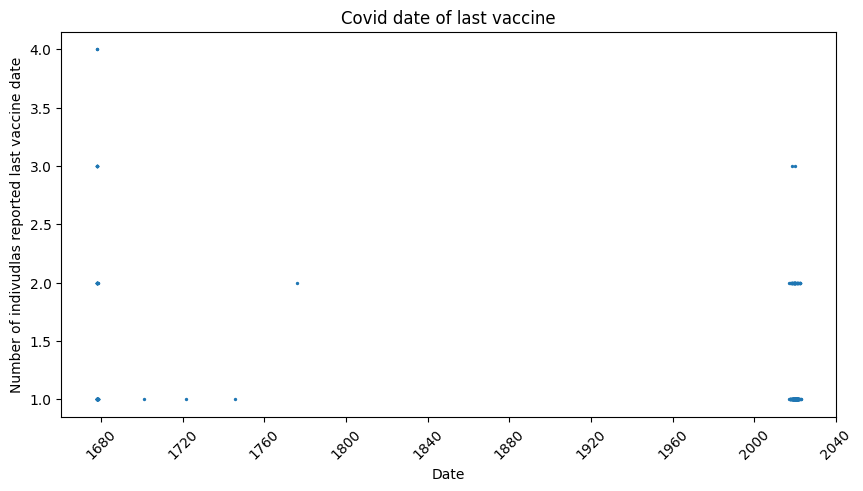

In [21]:
# Last vaccination date over time
# import matplotlib.pyplot as plt
date_counts = pl.dfs['covid'].groupby(pl.dfs['covid']['covid_vaccination_last_date'].dt.date).size()
plt.figure(figsize=(10,5))
plt.scatter(date_counts.index, date_counts.values, s=2)
plt.title('Covid date of last vaccine')
plt.xlabel('Date')
plt.ylabel('Number of indivudlas reported last vaccine date')
plt.xticks(rotation=45)
plt.show()

## Covid diagnosis

In [22]:
# Diagnosis
print('Diagnosis Count')
print(pl.dfs['covid']['covid_diagnosed'].value_counts())


Diagnosis Count
covid_diagnosed
No     334
Yes    268
Name: count, dtype: int64


In [23]:
print('Diagnosis Percentage')
print(pl.dfs['covid']['covid_diagnosed'].value_counts(normalize=True)*100)

Diagnosis Percentage
covid_diagnosed
No     55.481728
Yes    44.518272
Name: proportion, dtype: float64


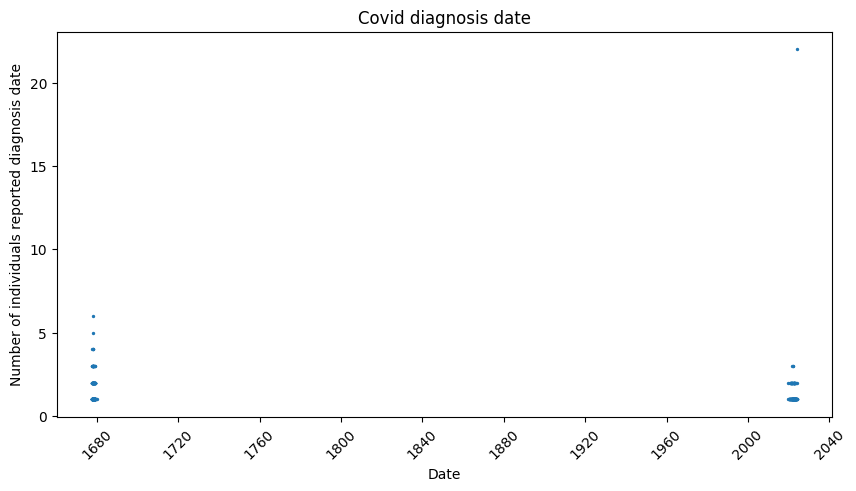

In [25]:
# Diagnosis date over time

date_counts = pl.dfs['covid'].groupby(pl.dfs['covid']['covid_diagnosed_date'].dt.date).size()
plt.figure(figsize=(10,5))
plt.scatter(date_counts.index, date_counts.values, s=2)
plt.title('Covid diagnosis date')
plt.xlabel('Date')
plt.ylabel('Number of individuals reported diagnosis date')
plt.xticks(rotation=45)
plt.show()